In [26]:
# importing libraries and packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# importing the database 
data = pd.read_csv('train.csv')

In [27]:
# convert data to numpy array and get its dimensions
data = np.array(data)
m, n = data.shape 

# shuffle data before splitting into dev and training sets
np.random.shuffle(data)

# take the first 1000 examples as development set and transpose it so each column is an example
data_dev = data[0:1000].T
Y_dev = data_dev[0]  # get labels for development set
X_dev = data_dev[1:n]  # get features for development set
X_dev = X_dev / 255.  # normalize the features

# take the remaining examples as training set and transpose it so each column is an example
data_train = data[1000:m].T
Y_train = data_train[0]  # get labels for training set
X_train = data_train[1:n]  # get features for training set
X_train = X_train / 255.  # normalize the features
_, m_train = X_train.shape  # get the number of examples in the training set

In [28]:
Y_train

array([4, 3, 6, ..., 0, 2, 8])

In [29]:
def init_params():
    """
    Initialize the parameters of a neural network with two hidden layers, where the first hidden layer has 10 neurons and the second hidden layer has 10 neurons. 
    - The input layer has 784 neurons (corresponding to a 28x28 pixel image), and the output layer has 10 neurons (corresponding to the 10 possible digits). 

    Returns:
    W1 -- weights for the first hidden layer, shape (10, 784)
    b1 -- biases for the first hidden layer, shape (10, 1)
    W2 -- weights for the second hidden layer, shape (10, 10)
    b2 -- biases for the second hidden layer, shape (10, 1)
    """
    W1 = np.random.rand(10, 784) - 0.5  # initialize weights for the first hidden layer randomly
    b1 = np.random.rand(10, 1) - 0.5  # initialize biases for the first hidden layer randomly
    W2 = np.random.rand(10, 10) - 0.5  # initialize weights for the second hidden layer randomly
    b2 = np.random.rand(10, 1) - 0.5  # initialize biases for the second hidden layer randomly
    W3 = np.random.rand(10, 10)  # initialize weights for the third hidden layer randomly
    b3 = np.random.rand(10, 1) # initialize biases for the third hidden layer randomly
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    """
    Compute the ReLU activation function on a given input Z.

    Arguments:
    Z -- the input to the ReLU function, a numpy array

    Returns:
    A -- the output of the ReLU function, a numpy array
    """
    return np.maximum(Z, 0)  # apply the ReLU function elementwise to the input Z

def softmax(Z):
    """
    Compute the softmax activation function on a given input Z.

    Arguments:
    Z -- the input to the softmax function, a numpy array

    Returns:
    A -- the output of the softmax function, a numpy array
    """
    A = np.exp(Z) / sum(np.exp(Z))  # apply the softmax function elementwise to the input Z
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    """
    Compute the forward propagation of a neural network with two hidden layers.

    Arguments:
    W1 -- weights for the first hidden layer, shape (10, 784)
    b1 -- biases for the first hidden layer, shape (10, 1)
    W2 -- weights for the second hidden layer, shape (10, 10)
    b2 -- biases for the second hidden layer, shape (10, 1)
    X -- input data, shape (784, m)

    Returns:
    Z1 -- output of the linear function of the first hidden layer, shape (10, m)
    A1 -- output of the activation function of the first hidden layer, shape (10, m)
    Z2 -- output of the linear function of the second hidden layer, shape (10, m)
    A2 -- output of the activation function of the second hidden layer, shape (10, m)
    """
    Z1 = W1.dot(X) + b1  # compute the linear function of the first hidden layer
    A1 = ReLU(Z1)  # apply the ReLU activation function to the output of the first hidden layer
    Z2 = W2.dot(A1) + b2  # compute the linear function of the second hidden layer
    A2 = softmax(Z2)  # apply the softmax
    Z3 = W3.dot(A2) + b3 # compute the linear function of the third hidden layer
    A3 = ReLU(Z3) # apply the ReLU activation function to the output of the new hidden layer
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    """
    Compute the derivative of the ReLU activation function on a given input Z.

    Arguments:
    Z -- the input to the ReLU function, a numpy array

    Returns:
    dA -- the derivative of the ReLU function, a numpy array
    """
    return Z > 0  # compute the derivative of the ReLU function elementwise to the input Z

def one_hot(Y):
    """
    Convert a vector of labels into a one-hot encoding.

    Arguments:
    Y -- a numpy array of labels, shape (m,)

    Returns:
    one_hot_Y -- the one-hot encoding of Y, shape (n, m)
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # initialize a matrix of zeros with dimensions (m, n)
    one_hot_Y[np.arange(Y.size), Y] = 1  # set the elements of one_hot_Y corresponding to the labels in Y to 1
    one_hot_Y = one_hot_Y.T  # transpose the matrix so that each column corresponds to a label
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    """
    Compute the backward propagation of a neural network with two hidden layers.

    Arguments:
    Z1 -- output of the linear function of the first hidden layer, shape (10, m)
    A1 -- output of the activation function of the first hidden layer, shape (10, m)
    Z2 -- output of the linear function of the second hidden layer, shape (10, m)
    A2 -- output of the activation function of the second hidden layer, shape (10, m)
    W1 -- weights for the first hidden layer, shape (10, 784)
    W2 -- weights for the second hidden layer, shape (10, 10)
    X -- input data, shape (784, m)
    Y -- labels, shape (m,)

    Returns:
    dW1 -- gradient of the cost with respect to W1, shape (10, 784)
    db1 -- gradient of the cost with respect to b1, shape (10, 1)
    dW2 -- gradient of the cost with respect to W2, shape (10, 10)
    db2 -- gradient of the cost with respect to b2, shape (10, 1)
    """
    one_hot_Y = one_hot(Y)  # convert the vector of labels Y into a one-hot encoding
    dZ2 = A2 - one_hot_Y  # compute the derivative of the cost function with respect to Z2
    dW2 = 1 / m * dZ2.dot(A1.T)  # compute the gradient of the cost with respect to W2
    db2 = 1 / m * np.sum(dZ2)  # compute the gradient of the cost with respect to b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  # compute the derivative of the cost function with respect to Z1
    dW1 = 1 / m * dZ1.dot(X.T)  # compute the gradient of the cost with respect to W1
    db1 = 1 / m * np.sum(dZ1)  # compute the gradient of the cost with respect to b1
    dZ3 = W3.T.dot(dZ2) * ReLU_deriv(Z3) 
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    """
    Update the parameters of a neural network with two hidden layers using gradient descent.

    Arguments:
    W1 -- weights for the first hidden layer, shape (10, 784)
    b1 -- biases for the first hidden layer, shape (10, 1)
    W2 -- weights for the second hidden layer, shape (10, 10)
    b2 -- biases for the second hidden layer, shape (10, 1)
    dW1 -- gradient of the cost with respect to W1, shape (10, 784)
    db1 -- gradient of the cost with respect to b1, shape (10, 1)
    dW2 -- gradient of the cost with respect to W2, shape (10, 10)
    db2 -- gradient of the cost with respect to b2, shape (10, 1)
    alpha -- learning rate

    Returns:
    W1 -- updated weights for the first hidden layer, shape (10, 784)
    b1 -- updated biases for the first hidden layer, shape (10, 1)
    W2 -- updated weights for the second hidden layer, shape (10, 10)
    b2 -- updated biases for the second hidden layer, shape (10, 1)
    """
    W1 = W1 - alpha * dW1  # update the weights for the first hidden layer using gradient descent
    b1 = b1 - alpha * db1  # update the biases for the first hidden layer using gradient descent
    W2 = W2 - alpha * dW2  # update the weights for the second hidden layer using gradient descent
    b2 = b2 - alpha * db2  # update the biases for the second hidden layer using gradient descent
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3

    return W1, b1, W2, b2, W3, b3  # return the updated parameters

In [30]:
def get_predictions(A2):
    """
    Get the predictions of a neural network with two hidden layers.

    Arguments:
    A2 -- output of the activation function of the second hidden layer, shape (10, m)

    Returns:
    predictions -- the predicted labels, a numpy array of shape (m,)
    """
    return np.argmax(A2, 0)  # return the index of the maximum value in each column of A2, which corresponds to the predicted label

def get_accuracy(predictions, Y):
    """
    Compute the accuracy of a set of predictions.

    Arguments:
    predictions -- a numpy array of predicted labels, shape (m,)
    Y -- a numpy array of true labels, shape (m,)

    Returns:
    accuracy -- the proportion of correct predictions, a scalar value between 0 and 1
    """
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size  # count the number of correct predictions and divide by the total number of predictions

def gradient_descent(X, Y, alpha, iterations):
    """
    Train a neural network with two hidden layers using gradient descent.

    Arguments:
    X -- input data, shape (784, m)
    Y -- labels, shape (m,)
    alpha -- learning rate
    iterations -- number of iterations of gradient descent to perform

    Returns:
    W1 -- weights for the first hidden layer, shape (10, 784)
    b1 -- biases for the first hidden layer, shape (10, 1)
    W2 -- weights for the second hidden layer, shape (10, 10)
    b2 -- biases for the second hidden layer, shape (10, 1)
    """
    W1, b1, W2, b2, W3, b3 = init_params()  # initialize the parameters of the neural network
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)  # perform forward propagation to compute the activations of each layer
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)  # perform backward propagation to compute the gradients of the cost function with respect to each parameter
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)  # update the parameters using gradient descent
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)  # get the predictions of the neural network
            print(get_accuracy(predictions, Y))  # compute the accuracy of the predictions
    return W1, b1, W2, b2, W3, b3 # return the trained parameters

In [40]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.2, 500)

Iteration:  0
[8 9 8 ... 9 8 8] [4 3 6 ... 0 2 8]
0.0846829268292683
Iteration:  10
[9 9 8 ... 2 2 8] [4 3 6 ... 0 2 8]
0.16909756097560977
Iteration:  20
[9 9 8 ... 2 2 8] [4 3 6 ... 0 2 8]
0.23285365853658538
Iteration:  30
[9 9 9 ... 2 2 8] [4 3 6 ... 0 2 8]
0.3182439024390244
Iteration:  40
[9 3 9 ... 2 2 8] [4 3 6 ... 0 2 8]
0.42534146341463414
Iteration:  50
[9 3 9 ... 2 9 8] [4 3 6 ... 0 2 8]
0.5040975609756098
Iteration:  60
[9 3 8 ... 2 9 8] [4 3 6 ... 0 2 8]
0.5642439024390243
Iteration:  70
[9 3 8 ... 2 6 8] [4 3 6 ... 0 2 8]
0.610390243902439
Iteration:  80
[9 3 8 ... 0 6 8] [4 3 6 ... 0 2 8]
0.651219512195122
Iteration:  90
[9 3 8 ... 0 4 8] [4 3 6 ... 0 2 8]
0.6839756097560976
Iteration:  100
[9 3 8 ... 0 4 8] [4 3 6 ... 0 2 8]
0.7116829268292683
Iteration:  110
[9 3 6 ... 0 4 8] [4 3 6 ... 0 2 8]
0.7346341463414634
Iteration:  120
[9 3 6 ... 0 4 8] [4 3 6 ... 0 2 8]
0.7526829268292683
Iteration:  130
[9 3 6 ... 0 4 8] [4 3 6 ... 0 2 8]
0.7666829268292683
Iteration:  140


In [41]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    """
    Make predictions using a trained neural network with two hidden layers.

    Arguments:
    X -- input data, shape (784, m)
    W1 -- weights for the first hidden layer, shape (10, 784)
    b1 -- biases for the first hidden layer, shape (10, 1)
    W2 -- weights for the second hidden layer, shape (10, 10)
    b2 -- biases for the second hidden layer, shape (10, 1)

    Returns:
    predictions -- the predicted labels, a numpy array of shape (m,)
    """
    _, _, _, A2, _, _ = forward_prop(W1, b1, W2, b2, W3, b3, X) # perform forward propagation to compute the activations of each layer
    predictions = get_predictions(A2) # get the predicted labels
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    """
    Test the prediction of a trained neural network with two hidden layers on a single image.

    Arguments:
    index -- the index of the image to test, an integer between 0 and m-1
    W1 -- weights for the first hidden layer, shape (10, 784)
    b1 -- biases for the first hidden layer, shape (10, 1)
    W2 -- weights for the second hidden layer, shape (10, 10)
    b2 -- biases for the second hidden layer, shape (10, 1)

    Returns:
    None
    """
    current_image = X_train[:, index, None]  # extract the current image from the training set
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)  # make a prediction for the current image using the trained neural network
    label = Y_train[index]  # get the true label of the current image
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255  # reshape the image and scale the values to the range [0, 255]
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')  # plot the image
    plt.show()

Prediction:  [4]
Label:  4


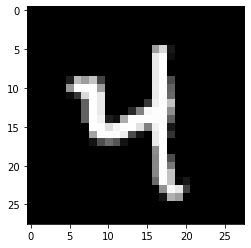

Prediction:  [3]
Label:  3


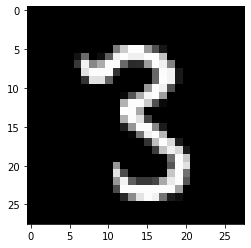

Prediction:  [6]
Label:  6


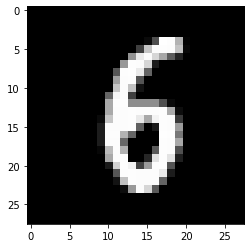

Prediction:  [7]
Label:  7


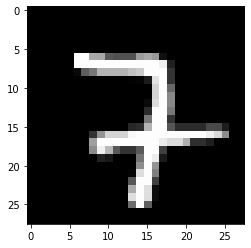

In [42]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [43]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[3 2 8 0 2 2 1 8 9 4 3 6 6 4 1 5 3 0 0 0 9 6 4 9 6 0 9 7 2 7 6 7 1 9 1 3 8
 0 7 5 1 4 8 6 1 7 3 9 0 4 1 7 8 4 1 9 9 1 1 5 8 1 6 2 6 2 6 0 7 6 5 0 8 3
 3 6 9 1 2 9 9 1 1 8 5 1 7 6 7 5 8 1 2 0 0 3 3 3 0 4 9 2 0 9 0 2 5 1 1 7 5
 8 1 9 7 3 0 2 6 5 6 8 0 1 2 1 7 3 8 4 6 8 3 7 3 0 8 2 3 1 4 0 4 1 9 0 4 7
 0 1 6 2 7 0 2 4 9 5 1 1 1 2 9 8 3 5 5 1 0 8 5 4 9 7 7 5 2 0 7 5 8 6 1 4 2
 2 3 1 2 2 1 3 5 7 9 0 4 6 2 3 7 9 5 6 2 9 0 7 3 5 6 4 6 1 3 2 1 6 4 7 4 1
 1 7 6 1 6 7 8 8 5 9 4 4 1 1 3 9 8 9 8 8 7 4 1 0 8 8 3 9 8 2 4 6 9 7 3 1 5
 9 9 1 7 6 4 6 4 2 6 3 0 1 1 3 1 4 4 8 9 6 0 2 1 9 7 7 8 4 7 6 2 7 3 5 5 8
 7 7 4 9 2 5 0 0 5 7 9 8 6 5 5 3 8 2 1 3 5 6 7 3 0 1 9 9 4 6 0 8 5 7 3 7 9
 1 0 8 8 1 6 9 0 7 0 3 8 7 7 8 4 5 0 7 2 4 7 1 6 1 7 9 5 8 2 1 6 6 6 0 7 2
 1 9 0 9 7 3 0 9 8 1 9 2 1 8 2 3 0 0 1 0 0 6 9 8 3 3 2 5 2 1 1 1 4 9 0 2 1
 7 1 3 3 0 5 1 3 1 3 3 2 3 0 4 5 1 9 6 0 2 7 4 1 2 2 3 2 1 6 0 3 0 7 7 4 3
 3 7 5 9 5 7 0 5 4 0 9 2 9 9 3 1 2 2 2 8 2 5 6 7 3 3 5 1 8 8 1 1 6 5 6 5 4
 9 0 4 4 4 7 5 5 3 1 8 8 

0.874